## Business Problem

> Which customer factors significantly impact medical insurance charges?
- Price insurance policies correctly
- Identify high-risk customers
- Control losses
- Design fair and profitable premiums



### Data Preparation

In [42]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')

### Data Pre inspection

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
df.shape

(1338, 7)

In [47]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
df.duplicated().sum()

np.int64(1)

In [50]:
df.isna().sum().sum()

np.int64(0)

### Data Cleaning

In [51]:
df=df.drop_duplicates()

### Exploratory Data Analysis
- Numeric Variable Analysis

In [52]:
# Mean, Median

num_col = df.select_dtypes(include = ['number'])
print(num_col.mean())
print('-------------------')
print(num_col.median())

age            39.222139
bmi            30.663452
children        1.095737
charges     13279.121487
dtype: float64
-------------------
age           39.0000
bmi           30.4000
children       1.0000
charges     9386.1613
dtype: float64


In [53]:
num_col = df.select_dtypes(include = ['number'])
df_stats = pd.DataFrame({
    'Mean': num_col.mean(),
    'Median': num_col.median()
})
df_stats

,Mean,Median
age,39.222139,39.0000
bmi,30.663452,30.4000
children,1.095737,1.0000
charges,13279.121487,9386.1613


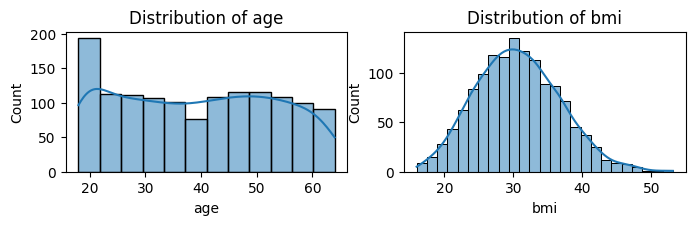

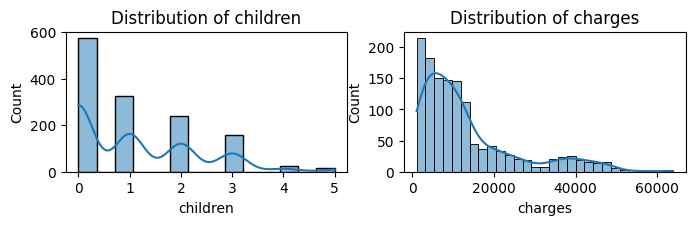

In [54]:
# variable Distribution
plt.figure(figsize =(8,4))
plt.subplot(2,2,1)
sns.histplot(data = df, x = 'age',kde = True)
plt.title('Distribution of age')
plt.subplot(2,2,2)
sns.histplot(data = df, x = 'bmi', kde = True)
plt.title('Distribution of bmi')

plt.figure(figsize = (8,4))
plt.subplot(2,2,1)
sns.histplot(data = df, x = 'children', kde = True)
plt.title('Distribution of children')
plt.subplot(2,2,2)
sns.histplot(data = df, x = 'charges',kde = True)
plt.title('Distribution of charges')
plt.show()

The EDA shows Age and BMI are well distributed.
- Age distribution is fairly uniform across all segments that indicates medical insurance charges are not influenced by a single age group.

- BMI Dstribution follows normarly distributed patterns
The BMI chart helps us group customers into health categories rather than judging anyone individually. Since many customers are in the overweight and obese range, BMI becomes useful for understanding risk and deciding suitable insurance pricing.

- Children Distribution clearly shows increasing the number of children dicreases the frequncy of customers. this clearly indicates that most policyholders have smaller family.

- The distribution of medical insurance charges is highly right-skewed, meaning most customers incur low to moderate costs, while a small number of customers generate very high medical expenses.Insurance companies need to identify and manage this high-risk group to control overall costs.

### Correlation between Target variable and features

Text(0.5, 1.0, 'correlation between charges, children, bmi, age')

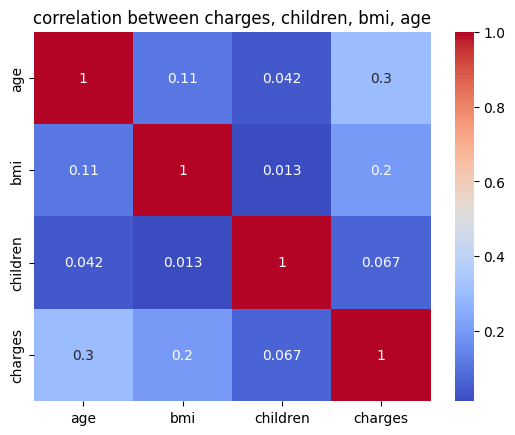

In [55]:
corr = num_col.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('correlation between charges, children, bmi, age')

In [56]:
num_col = df.select_dtypes(include = ['number'])
num_col.corr(method = 'spearman')['charges']

,charges
age,0.533523
bmi,0.119585
children,0.132200
charges,1.000000


Age shows a moderate positive correlation with medical charges, making it the most influential feature.
BMI and number of children show weak correlation individually, but they may still contribute when used with other features in a multivariate model.

## **Hypothesis Testing**
Age vs Charges

**Problem** Does age significantly affect medical charges?

Null Hypothesis (H₀):
Age has no significant relationship with charges   
(correlation = 0)

Alternative Hypothesis (H₁):
Age has a significant relationship with charges   
 (correlation ≠ 0)

  Significance lavel α = 0.05

In [57]:
from scipy.stats import spearmanr
α = 0.05
corr, p_value = spearmanr(df['age'],df['charges'])
corr,p_value

(np.float64(0.5335232787189862), np.float64(3.187755650322475e-99))

Since the p-value is less than 0.05, we reject the null hypothesis, indicating that the relationship between age and medical charges is statistically significant. The positive Spearman correlation coefficient (0.53) shows a moderate positive relationship, meaning medical charges tend to increase as age increases.

**Hypothesis** **testing**

BMI vs Charges

**Problem Statement**

Does BMI significantly affect medical charges?

Null Hypothesis

BMI has no significant relationship with medical charges.

𝐻0: 𝜌=0

Alternative Hypothesis (H₁)

BMI has a significant relationship with medical charges.

𝐻1: 𝜌≠0
Significance Level

𝛼 = 0.05

In [58]:
from scipy.stats import spearmanr
α = 0.05
corr, p_value = spearmanr(df['bmi'],df['charges'])
corr,p_value

(np.float64(0.11958495819244366), np.float64(1.1637179203181515e-05))

Since the p-value is less than 0.05, we reject the null hypothesis.
This indicates that BMI has a statistically significant but weak positive relationship with medical charges, meaning BMI has a limited individual effect on medical charges.

**Hypothesis** **testing**

Chindren vs Charges

**Problem Statement**

Does the number of children significantly affect medical charges?

Null Hypothesis (H₀)

Number of children has no significant relationship with medical charges.

H0​:ρ=0

Alternative Hypothesis (H₁)

Number of children has a significant relationship with medical charges.

H1​:ρ=0

Significance Level: α=0.05

In [59]:
from scipy.stats import spearmanr
α = 0.05
corr, p_value = spearmanr(df['children'],df['charges'])
corr,p_value

(np.float64(0.13220013322835855), np.float64(1.2303764274728683e-06))

analysis shows a weak positive relationship between the number of children and medical charges. With a correlation coefficient of 0.132 and a p-value below 0.05, the null hypothesis is rejected, indicating a statistically significant relationship. However, the low correlation value suggests that the number of children has only a minor effect on medical charges.

### T test
independent t-test ( gender vs charges)


**Problem Statement**
Does medical charges differ based on sex?

Null Hypothesis (H0):
Mean medical charges are the same for males and females

Alternative Hypothesis(H1):
Mean medical charges differ between males and females

significance level = 0.05

In [60]:
from scipy.stats import ttest_ind

male_charges = df[df['sex']=='male']['charges']
female_charges = df[df['sex'] =='female']['charges']

t_test_sex, p_value_sex = ttest_ind(male_charges,female_charges,equal_var = False)

t_test_sex, p_value_sex

(np.float64(2.1275372170149476), np.float64(0.033561547636765776))

The independent samples t-test indicates a statistically significant difference in medical charges between males and females. Since the p-value (0.0336) is less than the 0.05 significance level, the null hypothesis is rejected, suggesting that sex has a significant effect on medical charges.

### T test
independent t-test ( Smoker vs charges)

**Problem Statement**

Does Medical charges are differ based on smoker and non-smoker

Null Hypothesis(H0):

Mean of Charges are same for smoker and non-smoker

Ulternate Hypothesis(H1):

Mean of charges are different for smoker and non-smoker

Significance level = 0.05

In [61]:
from scipy.stats import ttest_ind
smoker_charges = df[df['smoker']=='yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']

smoker_ttest,smoker_p_value = ttest_ind(
    smoker_charges,non_smoker_charges, equal_var = False
)
smoker_ttest, smoker_p_value

(np.float64(32.7423097372529), np.float64(6.261720774727631e-103))

The independent samples t-test shows a highly significant difference in medical charges between smokers and non-smokers. Since the p-value is far below the 0.05 significance level, the null hypothesis is rejected, indicating that smoking status has a strong and statistically significant impact on medical charges.

## Feature Engineering


### Encoding Variables
One-Hot Encoding?
- Tree models require numeric inputs
- Avoids introducing false ordinal relationships

In [62]:
# Convert categories into numbers
df = pd.get_dummies(df, columns = ['sex','smoker','region'], drop_first = True)

In [63]:
# make a copy for use dataset in training models without scaling
df_RF = df.copy()

### Scaling
- Required for Linear Regression
- Not required for tree-based models (Random Forest, GB, XGB)


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

Why Log Transformation?
- Charges are right-skewed
- Improves linear model assumptions

In [65]:
df['charges_log'] = np.log1p(df['charges'])

In [66]:
X = df.drop(['charges_log','charges'], axis = 1)
y = df['charges_log']

In [67]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [68]:
# Select Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [69]:
# predict the outcome
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score,mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'rmse:',rmse)
print(f'r2:',r2)

rmse: 0.3977747132916927
r2: 0.829478626133356


The regression model explains approximately 87.7% of the variance in medical charges, indicating strong predictive performance. The RMSE value of 0.16 (on the log-transformed scale) suggests that prediction errors are relatively low.

## Random Forest Model
- Random Forest is used to handle non-linear relationships effectively by combining multiple decision trees, leading to improved prediction accuracy.

In [70]:
# Split Features and Target variables
X = df_RF.drop('charges',axis = 1)
y = df_RF['charges']

In [71]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [72]:
# Apply Random Forest model
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state = 42,n_estimators = 100)
RF_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [73]:
# Predict and evaluate model

from sklearn.metrics import r2_score,mean_squared_error
y_pred = RF_model.predict(X_test)

print(f'R2_Score:',r2_score(y_test,y_pred))
print(f'root_mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score: 0.8796611113027272
root_mean_squared_error 4702.4462291546515


The Random Forest model explains about 86.5% of the variation in medical charges with an average prediction error of approximately 4,576 units, demonstrating strong performance on non-linear data.

## Gradient Boost Regressor

In [74]:
# Apply Gradientboostregressor algorithm (without appling transformation on target variable)
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train,y_train)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42)

In [75]:
y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
print(f'r2_score:',r2_score(y_test,y_pred))
print(f'root_mean_squred_error:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.9013641431591025
root_mean_squred_error: 4257.339172112632


The model was built using the original data without applying any target transformation and showed strong performance. It is able to explain around 90% of the variation in the results, which indicates high reliability. The average difference between the predicted and actual values is relatively small, meaning the predictions are close to reality. Overall, the model performs well on real-world values, making the results easy to understand and suitable for clear, confident business decision-making.

In [76]:
# Apply gbr algorithm after transformation of target variable
X = df_RF.drop('charges',axis = 1)
y = df_RF['charges']

# apply transformation
y= np.log1p(df_RF['charges'])
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [77]:
# apply gbr model
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(
    n_estimators = 200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gbr_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42)

In [78]:
# predict and convert transformed target variable to back real value
y_pred_log = gbr_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
y_pred_real = np.expm1(y_pred_log)
y_test_log = np.expm1(y_test)
print(f'r2_score:',r2_score(y_test_log,y_pred_real))
print(f'root_mean_squred_error:',np.sqrt(mean_squared_error(y_test_log,y_pred_real)))

r2_score: 0.8917468844920234
root_mean_squred_error: 4460.063500213002


After applying target transformation, the model’s accuracy slightly decreased and prediction error increased after converting results back to the original scale. Since the model performs better without transformation and is easier to interpret, the untransformed model is the better choice.

## XGBoost Algorithm
XGBoost is an advanced version of gradient boosting that is faster, more accurate, and better at handling complex patterns in data. It automatically manages overfitting through regularization and usually performs very well on structured (tabular) data.

In [79]:
X = df_RF.drop('charges',axis = 1)
y= df_RF['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [80]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [81]:
y_pred = xgb.predict(X_test)
print(f'r2_score:',r2_score(y_test,y_pred))
print(f'root_mean_squred_error:',np.sqrt(mean_squared_error(y_test,y_pred)))


r2_score: 0.892974103929933
root_mean_squred_error: 4434.710521816194


XGBoost achieved strong performance with an R² score of 0.893 and an RMSE of 4,434, indicating accurate predictions of medical insurance charges. While it effectively captures non-linear patterns, it was slightly outperformed by Gradient Boosting, so it was not selected as the final model.

## Result Summary

In [83]:
import pandas as pd

model_results = {
    "Model": [
        "Linear Regression",
        "Random Forest Regressor",
        "Gradient Boosting Regressor",
        "XGBoost Regressor"
    ],
    "R2 Score": [
        0.8767,   # Linear Regression
        0.8797,   # Random Forest
        0.9014,   # Gradient Boosting (winner)
        0.8930    # XGBoost
    ],
    "RMSE": [
        "Log-scale (~0.16)",
        4702.44,
        4257.34,
        4434.71
    ],
    "Key Strength": [
        "Simple & interpretable",
        "Handles non-linearity",
        "Best accuracy & generalization",
        "Strong regularization"
    ]
}

comparison_df = pd.DataFrame(model_results)
comparison_df


,Model,R2 Score,RMSE,Key Strength
0,Linear Regression,0.8767,Log-scale (~0.16),Simple & interpretable
1,Random Forest Regressor,0.8797,4702.44,Handles non-linearity
2,Gradient Boosting Regressor,0.9014,4257.34,Best accuracy & generalization
3,XGBoost Regressor,0.8930,4434.71,Strong regularization


Gradient Boosting Regressor emerged as the best model, explaining ~90% of the variance in medical insurance charges with the lowest prediction error. Smoking status is the most influential factor, followed by age. While BMI and number of children show statistically significant relationships, their individual impact is comparatively weaker. The final model balances accuracy, interpretability, and real-world usability, making it suitable for insurance pricing and risk assessment.